# (23) Acro2Mask

**Motivation**: Get brain region mask from ARA acroym <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Create Allen object

In [2]:
from register.atlas import Allen
al = Allen()
template, _ = al.mcc.get_template_volume()

## Get mask from acro

In [3]:
acro = 'VISp'
mask = al.get_masks(acro)

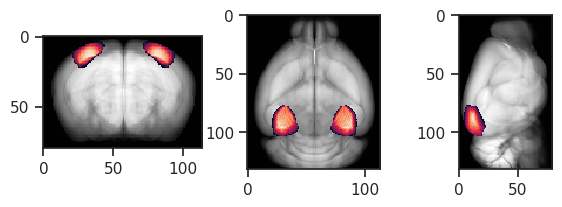

In [5]:
fig, axes = create_figure(1, 3, (7, 2))
for i, ax in enumerate(axes.flat):
    ax.imshow(template.mean(i), cmap='Greys_r')
    x2p = mask.mean(i)
    ax.imshow(mwh(x2p == 0, x2p))
plt.show()

## Load brain parcellation object

In [9]:
brain = '/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-128*3/parcellation'
brain = np.load(pjoin(brain, 'brain_100um.npy'))
x = brain.copy()
x[~mask] = 0

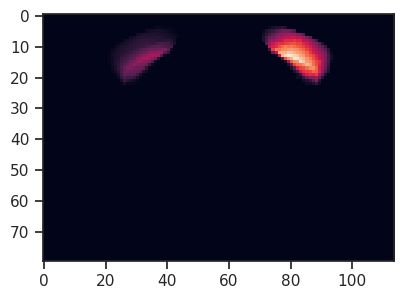

In [10]:
plt.imshow(x.mean(0));

In [12]:
rois_within_acro = list(unique_idxs(x))
len(rois_within_acro)

95

### Threshold

In [17]:
thres = 0.9
accepted_rois = []
for r in rois_within_acro:
    ratio = (x == r).sum() / (brain == r).sum()
    if ratio >= thres:
        accepted_rois.append(r)
accepted_rois = sorted(accepted_rois)
len(accepted_rois)

28

In [18]:
accepted_rois

[
    108,
    109,
    117,
    119,
    236,
    237,
    239,
    245,
    247,
    364,
    365,
    367,
    373,
    375,
    492,
    493,
    501,
    503,
    620,
    621,
    623,
    629,
    631,
    748,
    749,
    751,
    757,
    759
]